<a href="https://colab.research.google.com/github/MykolaRobot/ML_homework_2/blob/master/ML_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload=files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [0]:
import pandas as pd
df=pd.read_csv('weatherAUS.csv')

# 0. The goal is to predict whether it will be rain tomorrow or not.

# 1. Data Exploration and Preprocessing

In [5]:
# get shape of data
df.shape

(142193, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [0]:
# we need to drop some columns: 
# 'RISK MM' will make score 99.99, on kaggle's kernels they always drop it. 
# 'Cloud9am','Cloud3am','Evaporation','Sunshine' have almost 40% of missing data.
drop_col=['RISK_MM','Cloud9am','Cloud3pm','Evaporation','Sunshine','Date','Location']
df.drop(drop_col,axis=1,inplace=True)

In [0]:
# according to last homework best strategy was to drop rows with missing values
df=df.dropna(axis=0,how='any')

In [10]:
# new shape of data
df.shape

(112925, 17)

In [11]:
# 'Rain Today' and 'Rain Tomorrow'
print(df['RainToday'].value_counts())
print(df['RainTomorrow'].value_counts())

No     87556
Yes    25369
Name: RainToday, dtype: int64
No     87906
Yes    25019
Name: RainTomorrow, dtype: int64


In [0]:
# change 'Yes' and 'No' to 1 and 0
df['RainToday']=df[['RainToday']].apply(lambda raw: 1 if raw['RainToday']=='Yes' else 0,axis=1)
df['RainTomorrow']=df[['RainTomorrow']].apply(lambda raw: 1 if raw['RainTomorrow']=='Yes' else 0,axis=1)

In [13]:
# check apply functions
print(df['RainToday'].value_counts())
print(df['RainTomorrow'].value_counts())

0    87556
1    25369
Name: RainToday, dtype: int64
0    87906
1    25019
Name: RainTomorrow, dtype: int64


In [14]:
import numpy as np
#See unique values and convert them to int using pd.getDummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [15]:
# 62 columns
df.shape

(112925, 62)

# 2. Data Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

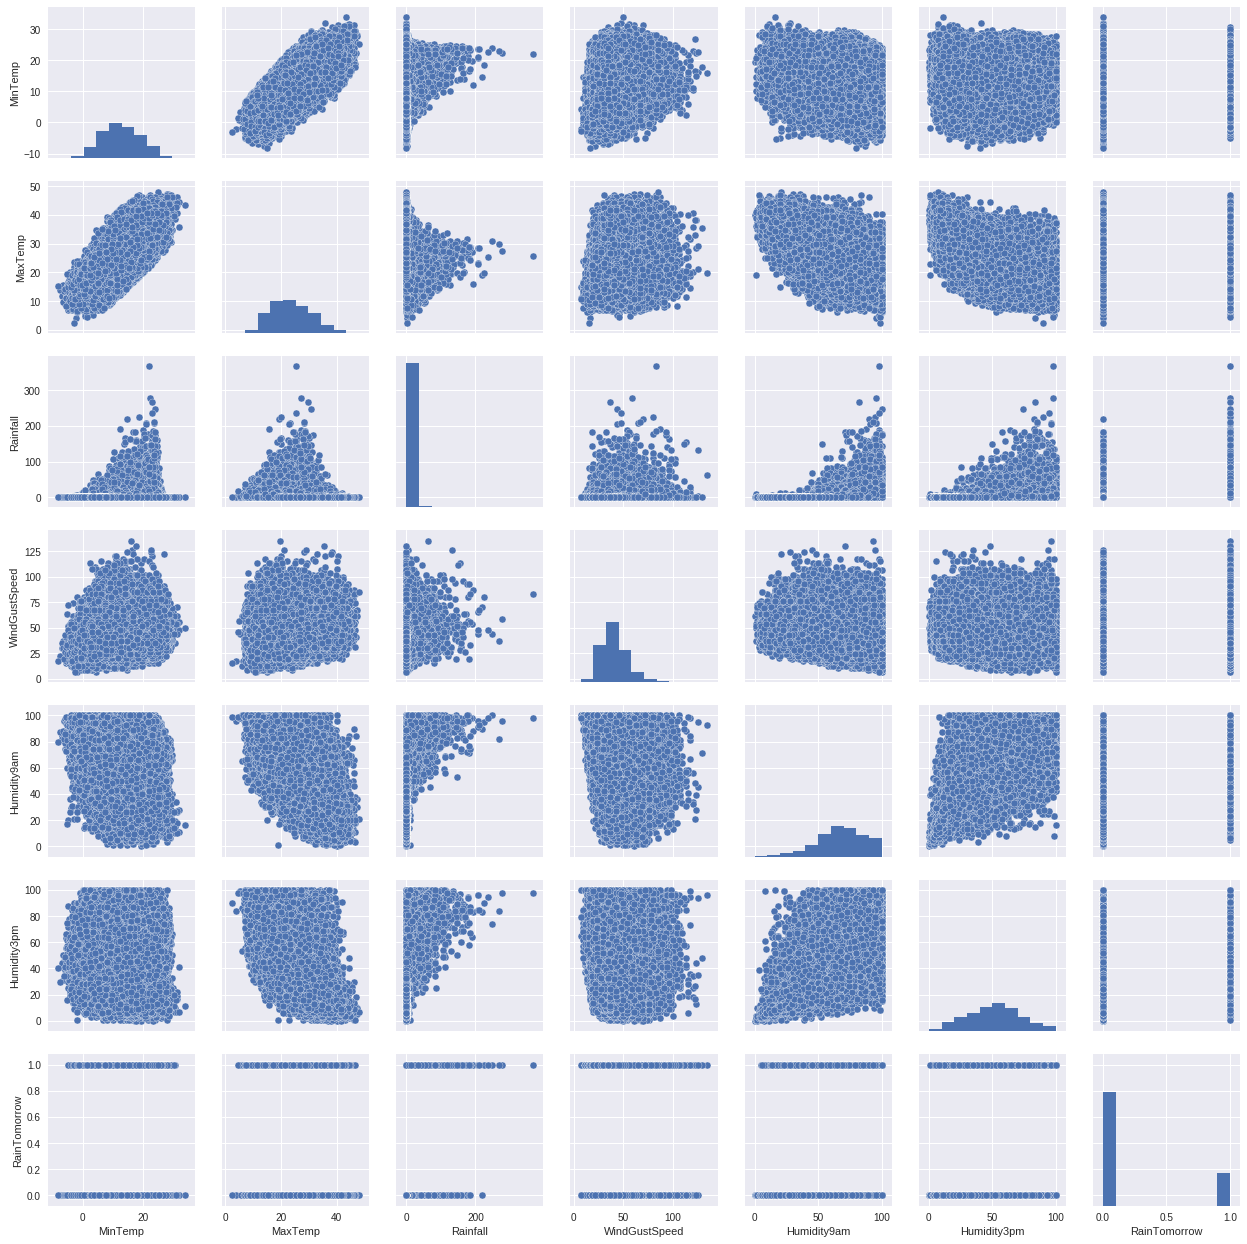

In [17]:
# Explore correlation 
sb.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','Humidity9am', 'Humidity3pm','RainTomorrow']])
plt.show()

1. MinTemp has strong correlation with MaxTemp.
2. Rainfall correlate with 'WindGustSpeed','Humidity9am', 'Humidity3pm', but not very.
3. In general, there are not many correlation between features. It is mean that each feature will give different data to model.

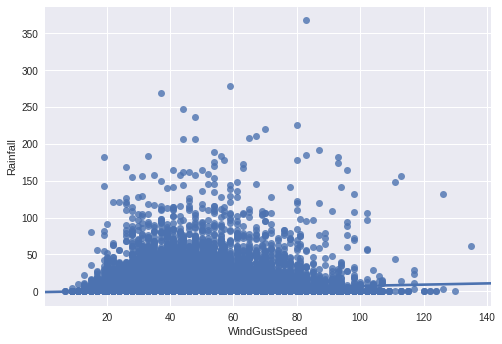

In [18]:
# explore separetely correlation between 'WindGustSpeed' and 'Rainfall' as scatter plot
# no evidence correlation
sb.regplot(x=df['WindGustSpeed'],y=df['Rainfall'])
plt.show()

In [0]:
heat_1=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']

heat_2=['WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW']

heat_3=['WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW']

heat_4=[ 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW']

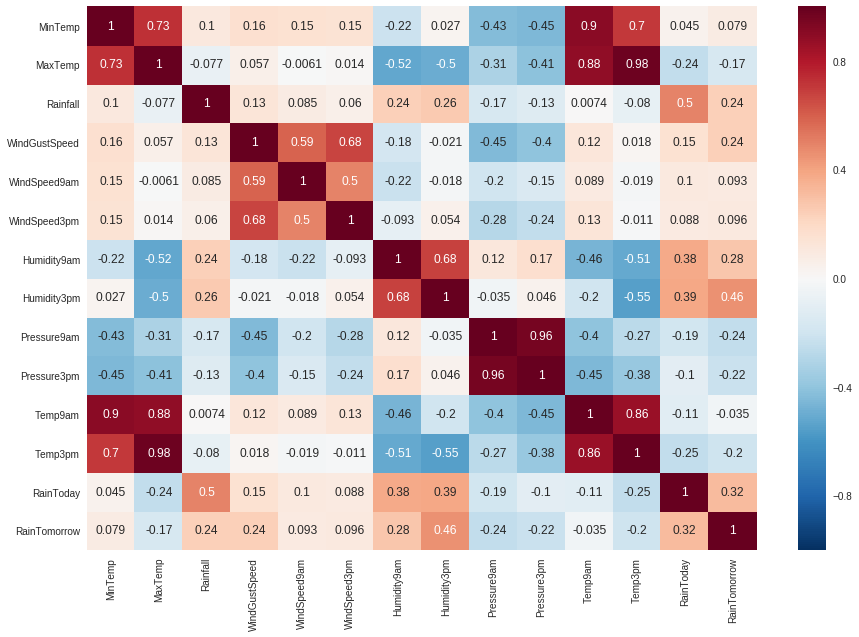

In [20]:
# let's calculate correlation for all features as heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(df[heat_1].corr(), annot=True)
plt.show()

Result:  'Humudity3pm','Humudity3pm','Rainfall','WindGustSpeed' affect target variable the most.

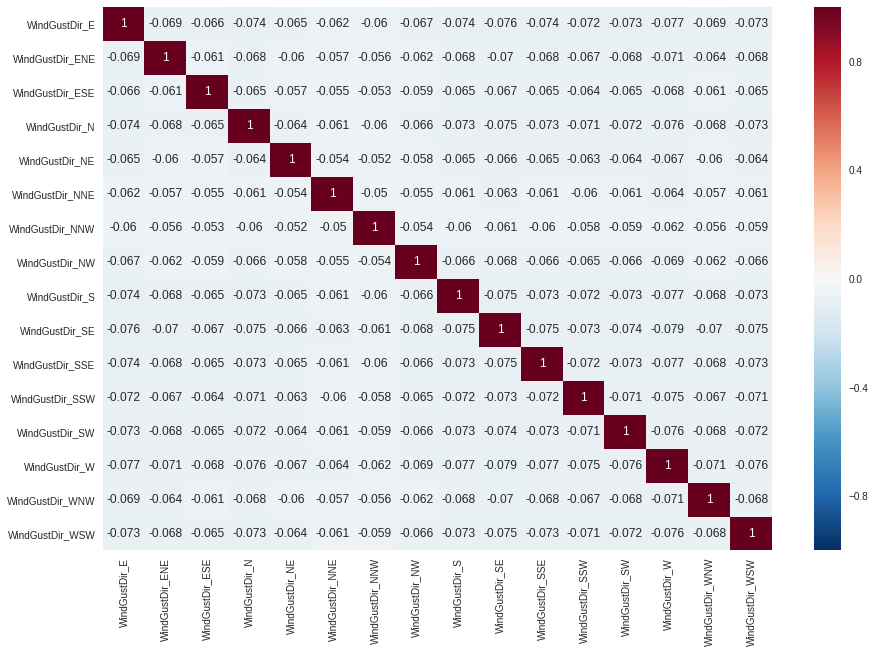

In [21]:
# let's calculate correlation for all features as heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(df[heat_2].corr(), annot=True)
plt.show()

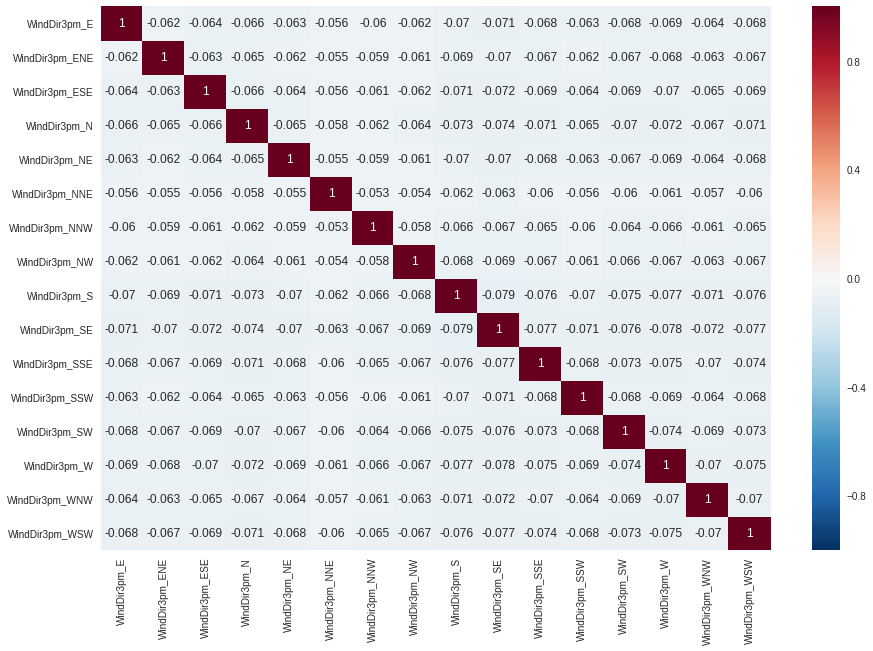

In [22]:
# let's calculate correlation for all features as heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(df[heat_3].corr(), annot=True)
plt.show()

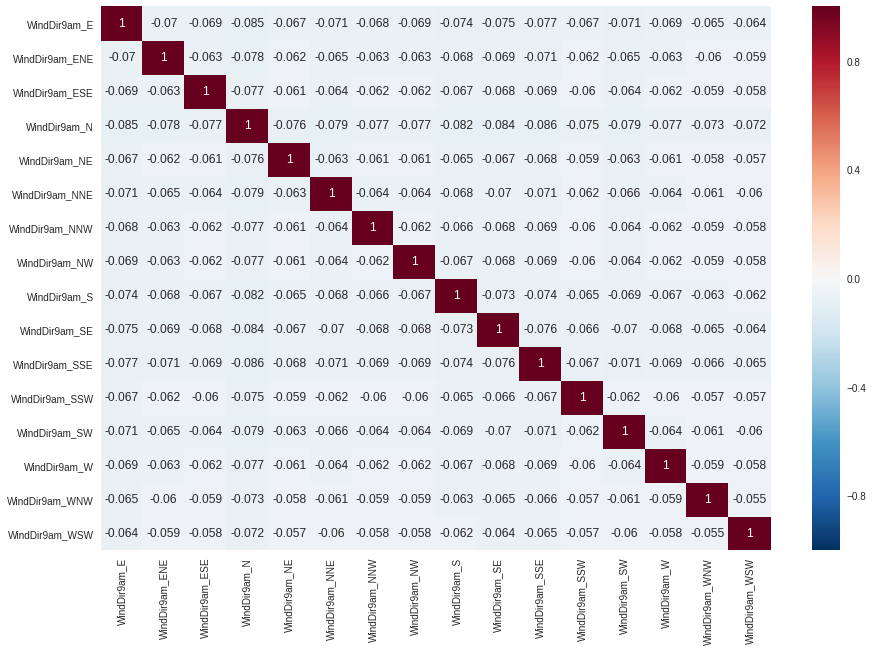

In [23]:
# let's calculate correlation for all features as heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(df[heat_4].corr(), annot=True)
plt.show()

Based on 3 previous heatmaps we saw that there are no correaltion between 'wind directions variables' and we can remove them.

In [0]:
df.drop(heat_2,axis=1,inplace=True)
df.drop(heat_3,axis=1,inplace=True)
df.drop(heat_4,axis=1,inplace=True)

In [25]:
# new shape of data
df.shape

(112925, 14)

# 3. Outliers detection and cleaning


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


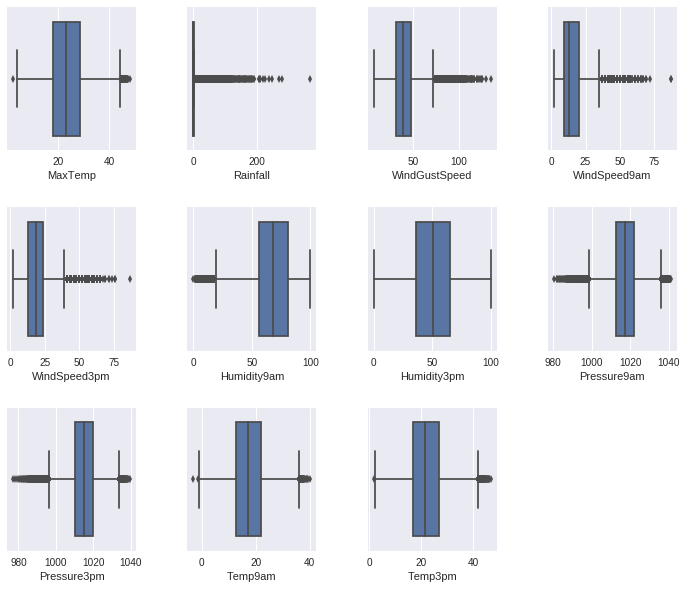

In [26]:
# plot our features as boxplot
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
columns=df.columns
for i in range(1, 12):
    ax = fig.add_subplot(3, 4, i)
    sb.boxplot(x=df[columns[i]])
plt.show()

We have many outliers.

In [27]:
# remove them based on z-score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
df_ = df[(z < 3).all(axis=1)]
print(df.shape[0] - df_.shape[0])

5057


In [28]:
# new shape
df_.shape

(107868, 14)

We remove 5057 raws as outliers.

# 4. Split data into train and test and scale feature data

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [0]:
# feature data X
X = df_.values[:,:-1]
# target variable y
y = df_.values[:,-1]

In [0]:
# scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

# 5.  Models

In [33]:
# check if data is unbalanced
d=df_['RainTomorrow'].value_counts()
print(f'{d[1]/df_.shape[0]}% / {d[0]/df_.shape[0]}%')


0.20759632142989579% / 0.7924036785701042%


So, we have 20.7% of one class and ~80% of another. It's mean, that data is not balanced well and we will not use accuracy as metric.
The metric will be roc_auc_score.

In [0]:
lr=LogisticRegression()
svm_rbf=svm.SVC(kernel='rbf')
svm_linear=svm.LinearSVC()
forest=RandomForestClassifier(n_estimators=50, max_depth=4,random_state=42)
zoo=dict({'LogisticRegression':lr,'SVM RBF':svm_rbf,'SVM Linear':svm_linear,'Random Forest':forest})

In [0]:
model_scores=dict()
for name,model in zoo.items():
  scores=cross_val_score(model,X_train,y_train,cv=5,scoring='roc_auc')
  model_scores[name]=scores.mean()

In [45]:
for name,score in model_scores.items():
  print(f"Accuracy for {name} : {score}")

Accuracy for LogisticRegression : 0.8626485533045674
Accuracy for SVM RBF : 0.8284436447459482
Accuracy for SVM Linear : 0.8627086774704569
Accuracy for Random Forest : 0.8390258645801772


Logistic regression gives the best result. Use it on test data.

# 6. Run best model on test data

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
best_model=LogisticRegression()
# tune for hyperparameters
y_pred=best_model.fit(X_train,y_train).predict(X_test)
score=roc_auc_score(y_test,y_pred)

In [48]:
score

0.7149707423850321

So, on test data we have worse result. Maybe we overfit our model.  